<a href="https://colab.research.google.com/github/Faisfaiz/machine-learning/blob/main/Weeks%209/Neural_Network_on_Air_Quality_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network On Air Quality Dataset Using Regression**

Nama: Faishal Anwar

Nim: 1103204096d

In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Misalkan dataset Anda berada di folder 'My Drive/Datasets' dan file CSV bernama 'your_dataset.csv'
file_path = '/content/drive/MyDrive/machine learning/CO2 Emissions_Canada.csv'
# Baca dataset menggunakan pandas
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# Select relevant features and target variable
features = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
target = df['CO2 Emissions(g/km)']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [12]:
# Menggunakan optimizer Adam dan mean squared error sebagai fungsi loss
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Melatih model dengan data latih
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

In [14]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

47/47 [==============================] - 0s 1ms/step
Mean Squared Error on Test Set: 241.29411265468678


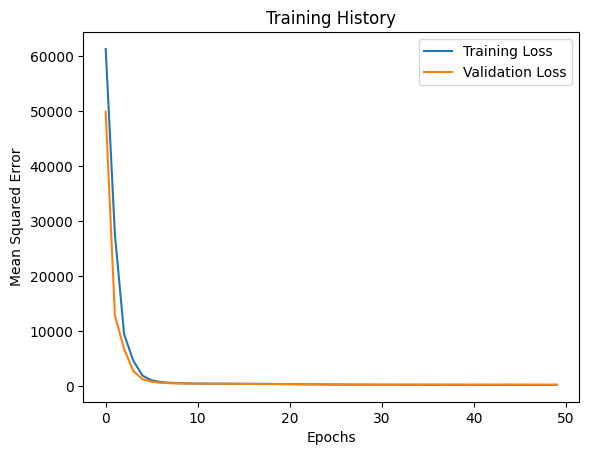

In [15]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()